In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = {
    'Word': [
        'pumbavu', 'shenzi', 'mjinga', 'mlevi', 'mavi', 'kiboko', 'busara', 'upendo', 
        'huruma', 'adabu', 'mpumbavu', 'jinga', 'mhalifu', 'mwizi', 'fisadi', 'msafi',
        'mwalimu', 'mwanafunzi', 'daktari', 'askari', 'mlaghai', 'katili', 'fisadi', 
        'mwendawazimu', 'msaliti', 'mkarimu', 'mnyenyekevu', 'rafiki', 'jirani', 'baba',
        'chizi', 'mzembe', 'takataka', 'mwasherati', 'mwanamke', 'mwanamme', 'mtoto', 
        'ndugu', 'mpumbavu', 'wendawazimu', 'mkatili', 'mwongo', 'mharibifu', 'mkweli', 
        'kiongozi', 'mpole', 'fundi', 'rafiki'
    ],
    'Label': [
        'Offensive', 'Offensive', 'Offensive', 'Offensive', 'Offensive', 'Non-Offensive', 
        'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Offensive', 
        'Offensive', 'Offensive', 'Offensive', 'Offensive', 'Non-Offensive', 'Non-Offensive', 
        'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Offensive', 'Offensive', 'Offensive', 
        'Offensive', 'Offensive', 'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 
        'Non-Offensive', 'Offensive', 'Offensive', 'Offensive', 'Offensive', 'Non-Offensive', 
        'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Offensive', 'Offensive', 'Offensive', 
        'Offensive', 'Offensive', 'Non-Offensive', 'Non-Offensive', 'Non-Offensive', 'Non-Offensive'
    ]
}


In [6]:
# Ensure all arrays in the data dictionary have the same length
min_length = min(len(data['Word']), len(data['Label']))
data = {key: value[:min_length] for key, value in data.items()}

df = pd.DataFrame(data)


In [7]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Word'])
y = df['Label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Accuracy: 0.4666666666666667
Classification Report:
                precision    recall  f1-score   support

Non-Offensive       0.00      0.00      0.00         8
    Offensive       0.47      1.00      0.64         7

     accuracy                           0.47        15
    macro avg       0.23      0.50      0.32        15
 weighted avg       0.22      0.47      0.30        15



c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [18]:
# Define test words
test_words = [ "mzembe", "takataka", "mwasherati", "mwanamke"]


In [20]:
# Transform test words
X_test_words = tfidf.transform(test_words)


In [21]:
# Classify test words
y_test_words_pred = model.predict(X_test_words)


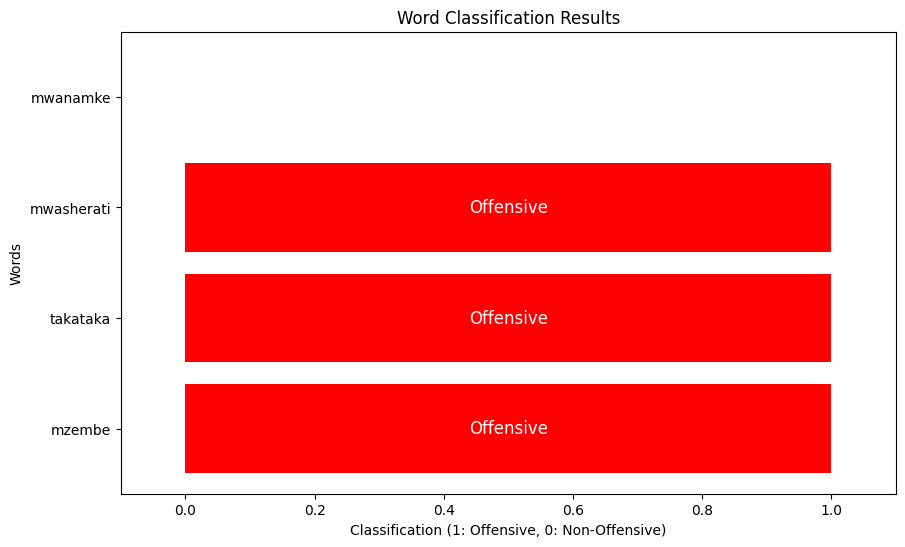

In [22]:
# Visualize output
import matplotlib.pyplot as plt
# Visualize output
plt.figure(figsize=(10, 6))
colors = ['red' if label == 'Offensive' else 'green' for label in y_test_words_pred]
plt.barh(test_words, [1 if label == 'Offensive' else 0 for label in y_test_words_pred], color=colors)
for index, value in enumerate(y_test_words_pred):
    plt.text(0.5, index, value, ha='center', va='center', color='white', fontsize=12)
plt.xlabel('Classification (1: Offensive, 0: Non-Offensive)')
plt.ylabel('Words')
plt.title('Word Classification Results')
plt.xlim(-0.1, 1.1)
plt.show()